In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
import re
import HTMLParser
import string
import itertools
import time
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df = pd.read_csv('Reviews.csv')
df.drop('Id', inplace=True, axis=1)
df.drop('ProductId', inplace=True, axis=1)
df.drop('HelpfulnessNumerator', inplace=True, axis=1)
df.drop('HelpfulnessDenominator', inplace=True, axis=1)
df.drop('ProfileName', inplace=True, axis=1)
df.drop('Time', inplace=True, axis=1)

## Make this a binary classifier model dataset
# 0 - bad, 1 - good
df.drop(df[df.Score == 3].index, inplace=True)
f = lambda x: 0 if x['Score'] < 3 else 1
df['Rating'] = df.apply(f, axis=1)

print df.columns

df['Text'].fillna('', inplace=True)
df['Summary'].fillna('', inplace=True)
df['UserId'].fillna('', inplace=True)
df['Score'].fillna(df['Score'].mean(), inplace=True)

html_parser = HTMLParser.HTMLParser()
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
vectorizer = TfidfVectorizer()
wordcloud = WordCloud(max_font_size=40)

def decode_characters_utf8(row):
    return row.decode("utf8").encode('ascii','ignore')

def split_joint_words_and_convert_to_lower(row):
    row = " ".join(re.findall('[A-Z][^A-Z]*', row))
    return row.lower()

def remove_punctuations_at_last_or_first(row):
    return ' '.join([word.strip(string.punctuation) for word in row.split(" ")])

def remove_html_tags(row):
    return html_parser.unescape(row)

def remove_urls(row):
    return re.sub(r"http\S+", "", row)

def standardize_words(row):
    return ''.join(''.join(s)[:2] for _, s in itertools.groupby(row))

def remove_stop_words(row):
    return ' '.join([w for w in word_tokenize(row) if not w in stop_words])

def remove_spl_char(row):
    return re.sub('[^a-zA-Z\n\.]', ' ', row)

def stem_words(row):
    return stemmer.stem(row)

Index([u'UserId', u'Score', u'Summary', u'Text', u'Rating'], dtype='object')


In [3]:
def pre_process_data(field):

    pre_processed_data = []
    
    for row in df[field]:
        row = decode_characters_utf8(row)
        row = split_joint_words_and_convert_to_lower(row)
        row = remove_punctuations_at_last_or_first(row)
        row = remove_html_tags(row)
        row = remove_urls(row)
        row = remove_spl_char(row)
        row = remove_stop_words(row)
        row = stem_words(row)
        
        pre_processed_data.append(row)
        
    return pre_processed_data

In [4]:
# Pre processing
t = time.time()
Text = pre_process_data('Text')
print "Time on Text: {} seconds".format(time.time() - t)
t = time.time()
Summary = pre_process_data('Summary')
print "Time on Summary: {} seconds".format(time.time() - t)

Time on Text: 281.136665106 seconds
Time on Summary: 81.6287391186 seconds


In [5]:
# Drawing a wordcloud of summary
summary = pd.DataFrame(Summary)
summary.columns = ['summary']
summary = summary.to_string()
summary = ' '.join([i.encode('ascii', 'ignore') for i in summary.split()])
wordcloud_summary = wordcloud.generate(summary)

(-0.5, 399.5, 199.5, -0.5)

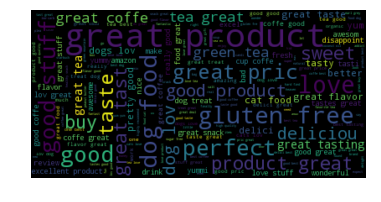

In [6]:
# plotting summary
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis("off")

In [7]:
# Drawing a wordcloud of text
text = pd.DataFrame(Text)
text.columns = ['text']
text = text.to_string()
text = ' '.join([i.encode('ascii', 'ignore') for i in text.split()])
wordcloud_text = wordcloud.generate(text)

(-0.5, 399.5, 199.5, -0.5)

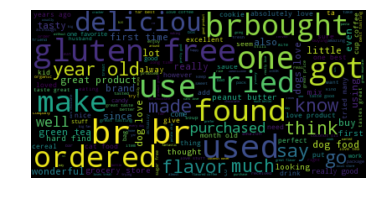

In [8]:
# plotting text
plt.imshow(wordcloud_text, interpolation='bilinear')
plt.axis("off")

In [9]:
# Dimensionality Reduction
#pca = PCA()
#pca = pca.fit()

In [10]:
# Vectorization
'''
tfidf = (max_features = 10)
X_text = tfidf.fit_transform(Summary).toarray()
y_text = df.iloc[:,4].values
'''

'\ntfidf = (max_features = 10)\nX_text = tfidf.fit_transform(Summary).toarray()\ny_text = df.iloc[:,4].values\n'

In [11]:
# split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_text , y_text, test_size = .2, random_state = 0)

# train naive bayes classifier
#clf = GaussianNB()
#clf.fit(X_train, y_train)

# predict results for test set
#predictor = clf.predict(X_test)

# construct the confusion matrix
#cm = confusion_matrix(y_test, predictor)